
## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
4. Download the `train.csv` file into this lab folder.
3. Create an iPython notebook and load the csv into pandas.


In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [56]:
#Load data in dataframe
train_df = pd.read_csv("./train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Find the average age of those who survived and those who did not

# Rmb and get familar with the .groupby() method
train_df.groupby('Survived')["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

**notes**
0: those who didn't survive
1: those who survived

Group by if the person survived. Then take the mean of the age in each group.


## Step 2: Cleaning the data
1. Create a bar chart showing how many missing values are in each column
  - *Bonus* : Theres a good library for visualizing missing values called Missingno.
      - [Install Instructions](https://pypi.org/project/missingno/)
      - [Usage Documentation](https://github.com/ResidentMario/missingno)
2. Which column has the most `NaN` values? How many cells in that column are empty?
3. Delete all rows where `Embarked` is empty
4. Fill all empty cabins with **¯\\_(ツ)_/¯**

Note: `NaN`, empty, and missing are synonymous.

Text(0.5, 1.0, 'Count Missing Values')

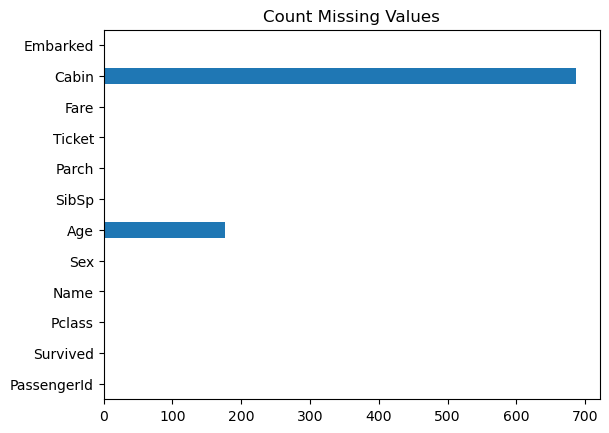

In [6]:
#Your code here 
train_df.isnull().sum().plot(kind='barh')
plt.title("Count Missing Values")

In [7]:
len(train_df)

891

In [8]:
train_df['Cabin'].isnull().mean() # This gives the percentage of 'Cabin' that is null

0.7710437710437711

In [9]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#Your code here 
# train_df.isnull().count().sort_values('Embarked', ascending=True).plot(kind='barh')

In [11]:
#Your code here 
# Delete 2 rows doesn't make much of a diff to your current dataset
train_df.dropna(subset=['Embarked'], inplace=True)

In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
len(train_df)

889

In [14]:
train_df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 889, dtype: object

In [15]:
#Your code here 
# try to insert emoji into the empty cabins
def insert_emoji(x):
    if type(x) == str:
        return str(x)
    else:
        return "¯\(ツ)/¯"
# train_df['Cabin'].apply(lambda x: "¯\(ツ)/¯" try x.isnull() except x)
train_df['Cabin'].apply(insert_emoji)

0      ¯\(ツ)/¯
1          C85
2      ¯\(ツ)/¯
3         C123
4      ¯\(ツ)/¯
        ...   
886    ¯\(ツ)/¯
887        B42
888    ¯\(ツ)/¯
889       C148
890    ¯\(ツ)/¯
Name: Cabin, Length: 889, dtype: object

In [16]:
#Your code here 
# Add the emoji using lambda function

train_df['Cabin'].apply(lambda x: "¯\(ツ)/¯" if (type(x) != str) else str(x))
# or can be done using
train_df['Cabin'] = train_df['Cabin'].apply(lambda x: str(x) if (type(x) == str) else "¯\(ツ)/¯")

In [17]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
train_df['Cabin'] = train_df['Cabin'].fillna('¯\(ツ)/¯')

## Step 3: Feature extraction
1.  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.
2. Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.
3. In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  - Familiarize yourself with the [`pd.get_dummies` documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)
  - Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  - Do the same thing for `Sex`
  - BONUS: Extract the title from everyone's name and create dummy columns

In [19]:
#Your code here 
train_df['FamilyCount'] = train_df['SibSp'] + train_df['Parch']
train_df.loc[train_df['Parch']>1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,¯\(ツ)/¯,S,2
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,¯\(ツ)/¯,S,6
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,¯\(ツ)/¯,S,6
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,5
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,¯\(ツ)/¯,C,3


In [20]:
#Your code here 
train_df['IsRverend'] = train_df['Name'].str.contains("Rev.").astype(int)
# Or u can use:
# train_df['IsRverend']=train_df['Name'].str.contains("Rev.").map({True: 1, False: 0})
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsRverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


In [21]:
len(train_df.loc[train_df['IsRverend']==1])

6

In [22]:
#Your code here 
# train_df_copy
# train_df_copy['Embarked_C'] = train_df['Embarked'].str.contains("C").astype(int)
# train_df_copy['Embarked_Q'] = train_df['Embarked'].str.contains("Q").astype(int)
# train_df_copy['Embarked_S'] = train_df['Embarked'].str.contains("S").astype(int)
# train_df_copy = train_df.drop(columns=["Embarked"])
# train_df_copy

In [23]:
train_df_copy = train_df

In [24]:
#Your code here 
train_df_copy['Embarked_Q'] = train_df['Embarked'].str.contains("Q").astype(int)
train_df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsRverend,Embarked_Q
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0


In [25]:
#Your code here 
train_df_copy['Embarked_S'] = train_df['Embarked'].str.contains("S").astype(int)
train_df_copy = train_df.drop(columns=["Embarked"])
train_df_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsRverend,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,1


In [57]:
#Your code here 
train_df=pd.get_dummies(train_df, columns=["Embarked"])
# train_df=pd.get_dummies(train_df, columns=["Embarked"], prefix = "What_Ever_Prefix_U_want", prefix_sep='WHAT U PUT TO SEPERATE')

In [27]:
#Your code here 
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsRverend,Embarked_Q,Embarked_S,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,1,0,0,1


In [62]:
#Your code here 
train_df=pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1


In [29]:
#Your code here 
train_df["Title"] = train_df["Name"].apply(lambda st: st[st.find(", ")+2:st.find(".")])
# DataFrame.apply(lambda: x: x.split(", ")[1].split(". ")[0])
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilyCount,IsRverend,Embarked_Q,Embarked_S,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Title
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,1,0,0,1,0,0,1,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,0,1,0,0,1,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,0,0,0,1,0,0,1,1,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,1,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,0,0,0,1,0,0,1,0,1,Mr


In [30]:
train_df=pd.get_dummies(train_df, columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,...,0,0,0,0,1,0,0,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,1,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,...,0,1,0,0,0,0,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,1,0,0,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,¯\(ツ)/¯,...,0,0,0,0,1,0,0,0,0,0


## Step 4: Exploratory analysis 
_[`df.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) may be very useful._

1. What was the survival rate overall?
2. Which gender fared the worst? What was their survival rate?
3. What was the survival rate for each `Pclass`?
4. Did any reverends survive? How many?
5. What is the survival rate for cabins marked **¯\\_(ツ)_/¯**
6. What is the survival rate for people whose `Age` is empty?
7. What is the survival rate for each port of embarkation?
8. What is the survival rate for children (under 12) in each `Pclass`?
9. Did the captain of the ship survive? Is he on the list?
10. Of all the people that died, who had the most expensive ticket? How much did it cost?
11. Does having family on the boat help or hurt your chances of survival?

In [31]:
#Your code here 
train_df['Survived'].mean() # Becasue the values are 0 and 1, u can just take mean to get the average

0.38245219347581555

In [32]:
train_df.groupby("Survived")['Sex_male'].sum()

Survived
0    468
1    109
Name: Sex_male, dtype: uint64

In [33]:
#Your code here
train_df.groupby("Survived")['Sex_male'].mean()

# This is asking how many of those who survived are male/ female?

# 0: male deceased/ all deceased
# 1: male survived/ all survived

Survived
0    0.852459
1    0.320588
Name: Sex_male, dtype: float64

In [34]:
train_df.groupby('Sex_male')['Survived'].sum()

Sex_male
0    231
1    109
Name: Survived, dtype: int64

In [35]:
train_df.groupby('Survived')['Sex_male'].sum()

Survived
0    468
1    109
Name: Sex_male, dtype: uint64

In [36]:
train_df.groupby('Sex_male')['Survived'].mean()

#This is asking how many of those are male survived?

# 0: female_survived/ all_female
# 1: male_survived/ all_male
# The difference in result is casued by different bases.

Sex_male
0    0.740385
1    0.188908
Name: Survived, dtype: float64

* Comments by SQ

In the first output:
0.188908 means that 18.89% of the Males survived (Sex_female=0 -> Male)
0.742038 means that 74.20% of the Females survived
This works because 'Survived' is a binary field (0 and 1) where 1 means survived. So taking the mean of this field, will essentially tell us the percentage of group that survived.
In the second output:
0.147541 means that 14.75% of the Not Survived are Females (Survived=0 -> Not Survived)
0.681287 means that 68.13% of the Survived are Females
This works because 'Females' is a binary field (0 and 1) where 1 means survived. So taking the mean of this field, will essentially tell us the percentage of group are Females.
You can instead of doing .mean, you can try .sum which give you the count of survived in the first output and count of females in the second output. Then, you will also be able to see that latter results from both output actually matches.
To push your understanding and intuition further, try think about the following questions:
What does the output tells me in business terms? In the first output, it tells me based on data that being a Female has a way higher chance of surviving as being a Male. Only 1 in 5 Males survived while 3 in 4 Females survived. (Try the interpretation of the second output yourself)
Does 1. make sense? Why is there such a pattern? In theory, gender should not affect the survival rate. However, the data does show otherwise. This is where we can proceed with hypothesis testing to verify if gender plays a role in the survival rate! (Do give it a try!) On another note, let's try to think about why there might be such a pattern. The dataset is referring to titanic dataset which is dated a long time ago. If we think about customs then, Females tend to be introvert and stay-at-home/shelter in this case. This result in them 'likely' to be all in cabin and rooms rather than out at deck or running around. Males on the other hand, tend to be more outgoing and 'problem-fixer', so where the titantic is about to sink, most of the men would likely be running around to help the ship and 'protecting' the young, elderly, females. This increases their risk of being swept away by the sea or getting injured and subsequently, death. Hence, a lower survival rate for Males. Of course, there are just my own speculations and have to be back by data and hypothesis testing. It is extremely important for data scientist/analyst to be able to identify causes or link data phenomenons to actual business setting because only then, you can make use of that data effectively and translate it to business value.
What does combining both results tells me? Specifically, the 74.20% and 68.13%. This is more on statistics. But understanding deeper, these 2 numbers actually comes from the same count. The only difference is the base. This hence tells me that there are more Survivors than there are Females. Be sensitive to data and numbers, often times, gold and gems are hidden in these kinds of numbers. Personally, I think that every single dataset have a story to tell. If you have not find anything, that means you are not looking deep enough. Now, how is this useful? This is where the creativity of data scientist comes in and how some really exceptional data scientists really separates themselves. The domain knowledge plays a strong importance in here, it gives you even more possible insights of the data and how to make use of them.

In [ ]:
train_df.groupby('Sex_male')['Survived'].mean()
# This is the % of survival, based on gender.
# 0: female survived/  all female
# 1: male survived/ all male
train_df.groupby("Survived")['Sex_male'].mean()
# This is the % of male in deceased and survived.
# 0: male deceased/ all deceased
# 1: male survived/ all survived 

In [37]:
#Your code here 

# .groupby() is where the DF is converted into different groups 4 u to see
# the arg that go into .groupby() is the kind of stuff u want to see ur df sorted by.
# So the code below is asking, for each class, how many % survived.
train_df.groupby("Pclass")['Survived'].mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [38]:
# 1.What was the survival rate overall?
train_df['Survived'].mean() # Becasue the values are 0 and 1, u can just take mean to get the average

0.38245219347581555

In [39]:
# 1.What was the survival rate overall?
total_valid_pass = len(train_df)
display(total_valid_pass)
num_survivied = len(train_df[train_df['Survived'] == 1])
display(num_survivied)
percent_survived = round(((num_survivied/total_valid_pass) * 100),2)
display(percent_survived)

889

340

38.25

In [40]:
# Which gender fared the worst? What was their survival rate?
# % survival by geneder
train_df.groupby("Sex_male")['Survived'].mean()

Sex_male
0    0.740385
1    0.188908
Name: Survived, dtype: float64

In [41]:
# Which gender fared the worst? What was their survival rate?

In [42]:
num_survivied_male = len(train_df[(train_df['Survived'] == 1) & (train_df['Sex_male'] == 1)])
display(num_survivied_male)
num_survivied_female = len(train_df[(train_df['Survived'] == 1) & (train_df['Sex_female'] == 1)])
display(num_survivied_female)
num_passed_male = len(train_df[(train_df['Survived'] == 0) & (train_df['Sex_male'] == 1)])
display(num_passed_male)
num_passed_female = len(train_df[(train_df['Survived'] == 0) & (train_df['Sex_female'] == 1)])
display(num_passed_female)

109

231

468

81

In [49]:
# What was the survival rate for each Pclass?
train_df.groupby("Pclass")['Survived'].mean()
# % survival by passenger class

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [50]:
# Did any reverends survive? How many?
len(train_df[(train_df["Title_Rev"] == 1) & (train_df['Survived'] == 1)])
# No reverend survived

0

In [51]:
train_df[train_df['IsRverend'] == 1]['Survived'].mean()

0.0

In [52]:
# What is the survival rate for cabins marked ¯\(ツ)/¯
train_df.groupby('Cabin')['Survived'].mean()
# 29.99% survived

Cabin
A10        0.000000
A14        0.000000
A16        1.000000
A19        0.000000
A20        1.000000
             ...   
F38        0.000000
F4         1.000000
G6         0.500000
T          0.000000
¯\(ツ)/¯    0.299854
Name: Survived, Length: 147, dtype: float64

In [53]:
train_df[train_df['Cabin'] == '¯\(ツ)/¯'][['Survived']].mean()

Survived    0.299854
dtype: float64

In [54]:
# What is the survival rate for people whose Age is empty?
train_df[train_df["Age"].isnull()]['Survived'].mean()
# 29.38% survived

0.2937853107344633

In [58]:
#Your code here 
# What is the survival rate for each port of embarkation?
for location in ['Embarked_C', 'Embarked_Q', 'Embarked_S']:
    print(location, ':')
    print(train_df[train_df[location] == 1][['Survived']].mean())
    print()

Embarked_C :
Survived    0.553571
dtype: float64

Embarked_Q :
Survived    0.38961
dtype: float64

Embarked_S :
Survived    0.336957
dtype: float64



In [59]:
#Your code here 
# What is the survival rate for children (under 12) in each Pclass?
train_df[train_df["Age"]<12].groupby("Pclass")['Survived'].mean()

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [60]:
#Your code here 
# Did the captain of the ship survive? Is he on the list?
display(train_df[train_df['Name'].str.contains('Capt.')])
display(train_df[train_df['Name'].str.contains('Capt.')]['Survived'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,0,0,1


745    0
Name: Survived, dtype: int64

In [56]:
#Your code here 
# Of all the people that died, who had the most expensive ticket? How much did it cost?
display(train_df[train_df['Survived'] == 0]['Fare'].max())
train_df[(train_df['Fare']==263.0) & (train_df['Survived'] == 0) ]

263.0

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
27,28,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0,C23 C25 C27,...,0,0,0,0,1,0,0,0,0,0
438,439,0,1,"Fortune, Mr. Mark",64.0,1,4,19950,263.0,C23 C25 C27,...,0,0,0,0,1,0,0,0,0,0


In [57]:
#Your code here 
train_df[train_df['Survived'] == 0].sort_values(by='Fare', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
27,28,0,1,"Fortune, Mr. Charles Alexander",19.0,3,2,19950,263.0000,C23 C25 C27,...,0,0,0,0,1,0,0,0,0,0
438,439,0,1,"Fortune, Mr. Mark",64.0,1,4,19950,263.0000,C23 C25 C27,...,0,0,0,0,1,0,0,0,0,0
118,119,0,1,"Baxter, Mr. Quigg Edmond",24.0,0,1,PC 17558,247.5208,B58 B60,...,0,0,0,0,1,0,0,0,0,0
557,558,0,1,"Robbins, Mr. Victor",NaN,0,0,PC 17757,227.5250,¯\(ツ)/¯,...,0,0,0,0,1,0,0,0,0,0
527,528,0,1,"Farthing, Mr. John",NaN,0,0,PC 17483,221.7792,C95,...,0,0,0,0,1,0,0,0,0,0


In [58]:
#Your code here 
# Does having family on the boat help or hurt your chances of survival?
train_df.groupby('SibSp')['Survived'].mean()

SibSp
0    0.343234
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [ ]:
#Your code here 

In [ ]:
#Your code here 

In [ ]:
#Your code here 

## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.


Text(0.5, 1.0, 'Surival rate by Gender')

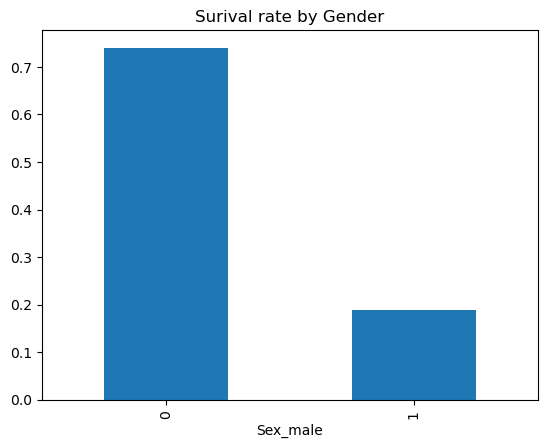

In [66]:
#Your code here 
train_df.groupby('Sex_male')['Survived'].mean().plot(kind='bar')
plt.title('Surival rate by Gender')

,survival,%
0,female_deceased,0.259615
1,female_survived,0.740385


,survival,%
0,male_deceased,0.811092
1,male_survived,0.188908


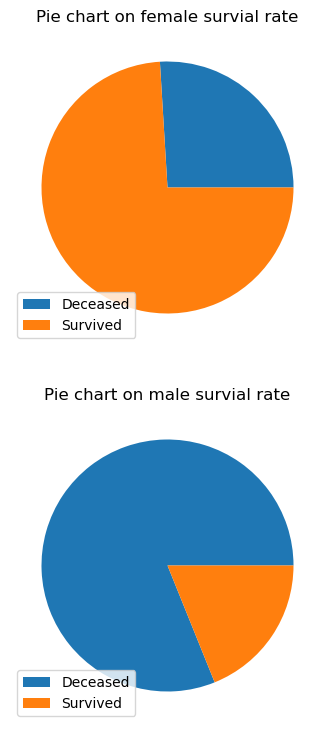

In [89]:
#Percentage of male survior 
female_survival_rate = pd.DataFrame([['female_deceased', 1-0.740385],['female_survived', 0.740385]], columns=['survival', '%'])
male_survival_rate = pd.DataFrame([['male_deceased', 1-0.188908],['male_survived', 0.188908]], columns=['survival', '%'])
display(female_survival_rate)
display(male_survival_rate)
plt.figure(figsize = (16, 9))
pi1 = plt.subplot(2,1,1)
pi1.set_title('Pie chart on female survial rate')
pi1.pie(female_survival_rate['%'])
pi1.legend(['Deceased', 'Survived'], loc='lower left')
pi1 = plt.subplot(2,1,2)
pi1.set_title('Pie chart on male survial rate')
pi1.pie(male_survival_rate['%'])
pi1.legend(['Deceased', 'Survived'], loc='lower left')

Text(0.5, 1.0, '% Male amongst Deceased and Survived')

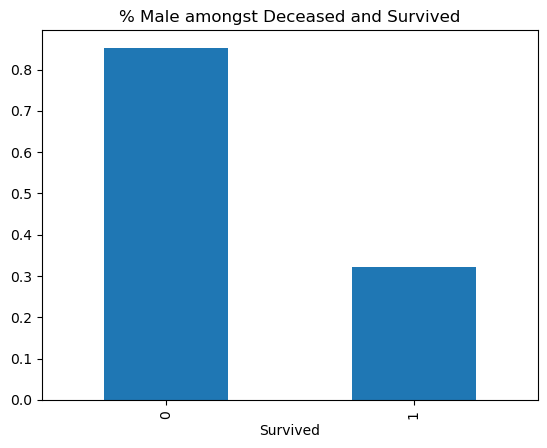

In [67]:
train_df.groupby('Survived')['Sex_male'].mean().plot(kind='bar')
plt.title('% Male amongst Deceased and Survived')

Text(0.5, 1.0, 'Surival rate by Pclass')

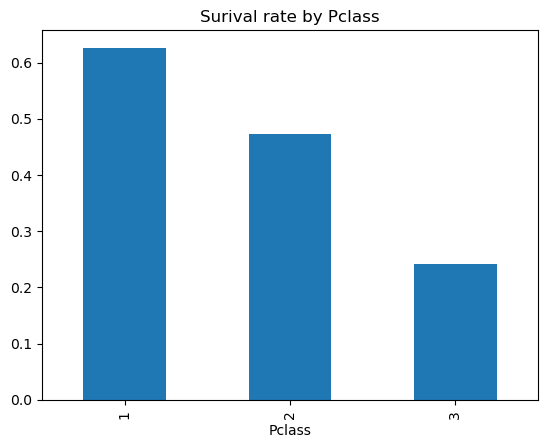

In [68]:
#Your code here 
train_df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.title('Surival rate by Pclass')

Text(0.5, 1.0, 'Surival rate by Pclass and Gender')

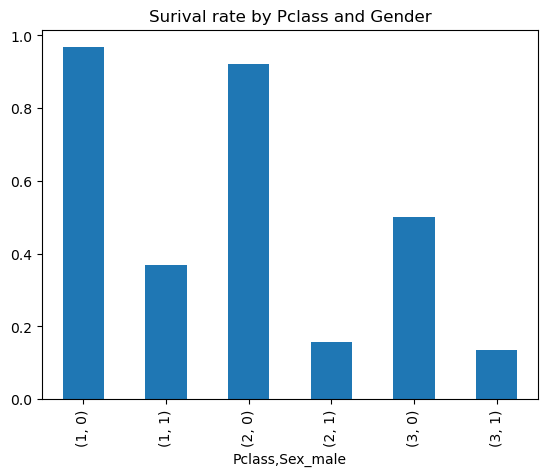

In [70]:
#Your code here 
train_df.groupby(['Pclass', 'Sex_male'])['Survived'].mean().plot(kind='bar')
plt.title('Surival rate by Pclass and Gender')

Text(0.5, 1.0, 'Average Number of Family Members')

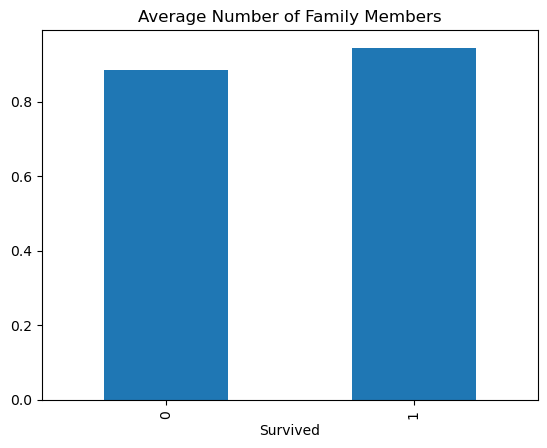

In [69]:
#Your code here 
train_df.groupby('Survived')['FamilyCount'].mean().plot(kind='bar')
plt.title('Average Number of Family Members')